In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from econsa.aleeciu import kucherenko_indices
from econsa.aleeciu import build_cov_mu

In [3]:
def test_fun1(args):
    return np.sum(args, axis=1)

def test_fun2(args):
    x1,x2,x3,x4 = np.hsplit(args,4)
    return x1*x3+x2*x4

In [4]:
rho_s = [0., 0.5, -0.5, 0.8, -0.8]
     
mu = np.array([[0.0], [0.0], [0.0]])
problem = {'num_vars': 3, 'dist': np.array(3*['norm']), 'prms': np.array([[0., 1.], 
                                                                          [0., 1.], 
                                                                          [0., 4.]])}
N = 1500

for rho in rho_s:
    results = pd.DataFrame(columns = ['S', 'ST'], 
                           index = ['X{}'.format(i) for i in range(1,problem['num_vars']+1)])

    df_cov = pd.DataFrame([[1.,0.,0.],
                           [0.,1.,rho*2.],
                           [0.,rho*2.,4.]])

    print('rho = {}'.format(rho))
    
    # X1
    factors = [0]
    
    cov_, mu_ = build_cov_mu(df_cov, mu, factors)
    
    a, b = kucherenko_indices(test_fun1, cov_, mu_, problem, N)
    
    results.loc['X1','S'] = a; results.loc['X1','ST'] = b
    
    # X2
    factors = [1]
    
    cov_, mu_ = build_cov_mu(df_cov, mu, factors)
    
    a, b = kucherenko_indices(test_fun1, cov_, mu_, problem, N)
    
    results.loc['X2','S'] = a; results.loc['X2','ST'] = b
    
    # X3
    factors = [2]

    cov_, mu_ = build_cov_mu(df_cov, mu, factors)
    
    a, b = kucherenko_indices(test_fun1, cov_, mu_, problem, N)
    
    results.loc['X3','S'] = a; results.loc['X3','ST'] = b
    
    print(results)
    print('\n')

rho = 0.0
           S        ST
X1  0.160204  0.166698
X2  0.160204  0.166698
X3  0.666616  0.664613


rho = 0.5
           S         ST
X1  0.119189   0.124935
X2  0.498518  0.0937188
X3  0.781664   0.374027


rho = -0.5
            S        ST
X1   0.246611  0.250143
X2 -0.0112764  0.187286
X3   0.561858  0.746157


rho = 0.8
           S         ST
X1   0.10512   0.108544
X2  0.735123  0.0390325
X3  0.852551   0.155925


rho = -0.8
           S        ST
X1  0.357782  0.357523
X2   0.11747  0.128345
X3  0.513729  0.510899




In [5]:
import econsa.kucherenko as kh   

In [6]:
rho = 0.0

cov = np.array([
    [1.,0.,0.],
    [0.,1.,rho*2.],
    [0.,rho*2.,4.]
])

In [7]:
indices = kh.kucherenko_indices(test_fun1, mu.reshape(-1), cov)

## Compare kucherenko samples

In [4]:
from econsa.aleeciu import kucherenko_sampling
import econsa.kucherenko as kh

In [34]:
mu = np.array([[0.0], [0.0], [0.0]])
problem = {'num_vars': 3, 'dist': np.array(3*['norm']), 'prms': np.array([[0., 1.], 
                                                                          [0., 1.], 
                                                                          [0., 4.]])}
N = 10000

rho = 0.2
factors = [0]
df_cov = pd.DataFrame([[1.,0.,0.],
                       [0.,1.,rho*2.],
                       [0.,rho*2.,4.]])

    
cov, mu = build_cov_mu(df_cov, mu, factors)

In [35]:
x, xc = kucherenko_sampling(problem, N, cov, mu, s=1)

In [38]:
np.cov(x, rowvar=0).round(2)

array([[ 1. , -0. , -0. ],
       [-0. ,  1. ,  0.4],
       [-0. ,  0.4,  4. ]])

In [39]:
np.cov(samples.independent, rowvar=0).round(2)

array([[ 1. ,  0. , -0. ],
       [ 0. ,  1. ,  0.4],
       [-0. ,  0.4,  4. ]])

In [40]:
np.cov(xc, rowvar=0).round(2)

array([[ 1. , -0. , -0. ],
       [-0. ,  1. ,  0.4],
       [-0. ,  0.4,  4. ]])

In [41]:
np.cov(samples.conditional, rowvar=0).round(2)

array([[1. , 0. , 0. ],
       [0. , 1. , 0.4],
       [0. , 0.4, 4. ]])

In [36]:
mean = mu.reshape(-1)
cov = cov.values

In [37]:
samples = kh._kucherenko_samples(mean, cov, N, "sobol", 1)

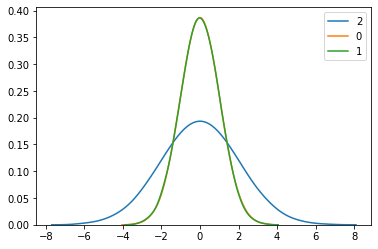

In [19]:
for col in x.columns:
    sns.kdeplot(x[col])

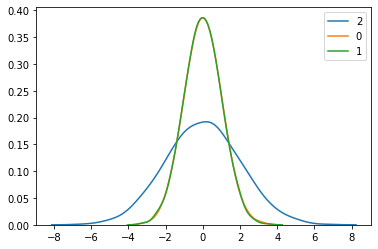

In [20]:
for col in xc.columns:
    sns.kdeplot(xc[col])

(-8, 8)

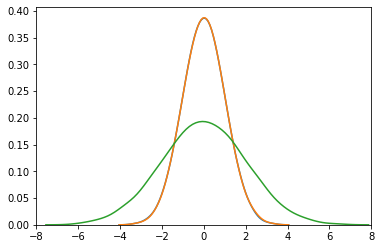

In [21]:
for i in range(3):
    sns.kdeplot(samples.conditional[:, i])
    
plt.xlim(-8, 8)

(-8, 8)

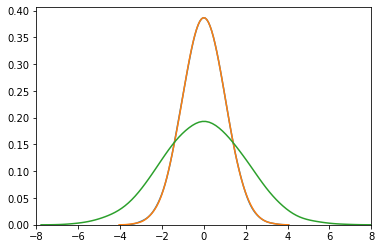

In [22]:
for i in range(3):
    sns.kdeplot(samples.independent[:, i])
    
plt.xlim(-8, 8)

In [56]:
covv = np.array([[1, 0, 0], [0, 2, 0.5], [0, 0.5, 3]])

In [59]:
covv

array([[1. , 0. , 0. ],
       [0. , 2. , 0.5],
       [0. , 0.5, 3. ]])

In [61]:
kh._shift_cov(covv, 2)

array([[3. , 0. , 0.5],
       [0. , 1. , 0. ],
       [0.5, 0. , 2. ]])

In [62]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
kh._shift_mean(x, 9)

array([9, 0, 1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
arr = np.arange(10).reshape(2, 5)

In [7]:
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [5]:
import econsa.kucherenko as kh

In [8]:
shifted = kh._shift_array(arr, 3)

In [10]:
shifted

array([[3, 4, 0, 1, 2],
       [8, 9, 5, 6, 7]])

In [11]:
kh._shift_array(shifted, 2)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [12]:
bigcov = np.array([
    [1, 0.5, 0.2, 0],
    [0.5, 2, 0, 0.3],
    [0.2, 0, 3, 0],
    [0, 0.3, 0, 4]
])

In [16]:
bigcov

array([[1. , 0.5, 0.2, 0. ],
       [0.5, 2. , 0. , 0.3],
       [0.2, 0. , 3. , 0. ],
       [0. , 0.3, 0. , 4. ]])

In [17]:
kh._shift_cov(bigcov, 2)

array([[3. , 0. , 0.2, 0. ],
       [0. , 4. , 0. , 0.3],
       [0.2, 0. , 1. , 0.5],
       [0. , 0.3, 0.5, 2. ]])

In [1]:
import numpy as np
import chaospy as cp

In [2]:
n_draws = 10_000
n_params = 3
sampling_scheme = "sobol"
seed=0

In [3]:
np.random.seed(seed)

In [ ]:
draws = cp.generate_samples(
    order=n_draws, domain=2 * n_params, rule="sobol"
).T

In [25]:
u = draws[:, :n_params]
u_prime = draws[:, n_params:]

In [26]:
np.cov(u, rowvar=0).round(4)
np.cov(u_prime, rowvar=0).round(4)

array([[0.0839, 0.0006, 0.0004],
       [0.0006, 0.0827, 0.001 ],
       [0.0004, 0.001 , 0.0834]])

In [24]:
draws = np.random.uniform(size=(n_draws, 2*n_params))